# **British Airways Forage Data Science Task 1 Code Pipeline**

## **Author:** Mariah Noelle Cornelio

- **Data Obtained from Forage's British Airways Data Science Job Simulation:** https://www.theforage.com/simulations/british-airways/data-science-yqoz?reloaded=true
- **Task 1:** Plan for future lounge demand using strategic data modeling.

## **Outline for This Pipeline**

1. Understanding the task and background information
2. Load dataframe and packages
3. Exploratory data analysis
4. Choosing groupings
5. Statistical calculations for each grouping
6. Conclusion

### **Part 1: Understanding the task and background information**

Before beginning any coding, I always like to break down what the task at hand is and make sure I have a good general understanding of the domain knowledge the challenge is a part of. For this task, I am working for British Airways and they would like me to take a look at lounge demand for Heathrow's Terminal 3. 

A lounge is a room in the airport, usually within the terminal around the gates, and it is where passengers will go to chill before their flights. Some lounges are available to non-members of an airline for a price, but some lounges are exclusive to passengers who are subscribed for a membership to a specific airline. In this case, we are working with British Airways and 3 lounges at Heathrow Airport Terminal 3: Concorde Room (Tier 1), First Lounge (Tier 2), and the Club Lounge (Tier 3). Passengers who are eligibile to enter each lound depends on certain criteria, like if they have a gold membership (loyalty status/travel class) or not.

Depending on the time of day, flights of the day (how long they are and where they are headed), and other factors, sometimes a lot of people want to use the lounges (high lounge demand) and at times lounges will reach full capacity. The task given asks to model lounge demand using high-level groupings like time of day, type of route (long haul or short hauls), and region/destination group. After creating what seems to be the most important groupings, the tasks wants estimates of proportion of passengers in each group who are likely to be eligible for each lounge. This shows British Airways how many passengers might want to head to that lounge that day and can help staff prepare for any high-demand times. Knowing when a time of high-demand is can help lounge staff stock up the lounge's amenities (like making more food or dessert for that day). 

### **Part 2: Load dataframe and packages**

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data

df = pd.read_csv("BASummerSchedule_df.csv")

In [3]:
df.head(5)

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,9/2/2025,14:19,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,6/10/2025,6:42,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,10/27/2025,15:33,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,6/15/2025,18:29,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,8/25/2025,20:35,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27


### **Part 3: Exploratory data analysis**

**General data exploration**

In [4]:
df.shape

# 10,000 rows amd 17 columns

(10000, 17)

In [5]:
# See unique column names

df.columns

Index(['FLIGHT_DATE', 'FLIGHT_TIME', 'TIME_OF_DAY', 'AIRLINE_CD', 'FLIGHT_NO',
       'DEPARTURE_STATION_CD', 'ARRIVAL_STATION_CD', 'ARRIVAL_COUNTRY',
       'ARRIVAL_REGION', 'HAUL', 'AIRCRAFT_TYPE', 'FIRST_CLASS_SEATS',
       'BUSINESS_CLASS_SEATS', 'ECONOMY_SEATS', 'TIER1_ELIGIBLE_PAX',
       'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX'],
      dtype='object')

In [6]:
# Info of features and their dtypes
# Note that there are no null values! This is a full dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FLIGHT_DATE           10000 non-null  object
 1   FLIGHT_TIME           10000 non-null  object
 2   TIME_OF_DAY           10000 non-null  object
 3   AIRLINE_CD            10000 non-null  object
 4   FLIGHT_NO             10000 non-null  object
 5   DEPARTURE_STATION_CD  10000 non-null  object
 6   ARRIVAL_STATION_CD    10000 non-null  object
 7   ARRIVAL_COUNTRY       10000 non-null  object
 8   ARRIVAL_REGION        10000 non-null  object
 9   HAUL                  10000 non-null  object
 10  AIRCRAFT_TYPE         10000 non-null  object
 11  FIRST_CLASS_SEATS     10000 non-null  int64 
 12  BUSINESS_CLASS_SEATS  10000 non-null  int64 
 13  ECONOMY_SEATS         10000 non-null  int64 
 14  TIER1_ELIGIBLE_PAX    10000 non-null  int64 
 15  TIER2_ELIGIBLE_PAX    10000 non-null 

In [7]:
# Check if there are any duplicated values, there are none

df.duplicated().sum()

np.int64(0)

In [8]:
# Unique variables of each feature (I only chose the variables that were relevant to the question)

cols=['TIME_OF_DAY', 'DEPARTURE_STATION_CD', 'ARRIVAL_STATION_CD', 'ARRIVAL_COUNTRY','ARRIVAL_REGION', 'HAUL', 'TIER1_ELIGIBLE_PAX','TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']

for col in cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))


--- TIME_OF_DAY ---
TIME_OF_DAY
Morning      3530
Evening      2973
Afternoon    2305
Lunchtime    1192
Name: count, dtype: int64

--- DEPARTURE_STATION_CD ---
DEPARTURE_STATION_CD
LHR    10000
Name: count, dtype: int64

--- ARRIVAL_STATION_CD ---
ARRIVAL_STATION_CD
FRA    714
MUC    691
DXB    688
VIE    682
HND    679
ORD    675
MAD    673
LAX    666
JFK    664
DFW    653
IST    650
BCN    645
AMS    641
CDG    641
ZRH    638
Name: count, dtype: int64

--- ARRIVAL_COUNTRY ---
ARRIVAL_COUNTRY
USA            2658
Germany        1405
Spain          1318
UAE             688
Austria         682
Japan           679
Turkey          650
Netherlands     641
France          641
Switzerland     638
Name: count, dtype: int64

--- ARRIVAL_REGION ---
ARRIVAL_REGION
Europe           5975
North America    2658
Middle East       688
Asia              679
Name: count, dtype: int64

--- HAUL ---
HAUL
SHORT    5975
LONG     4025
Name: count, dtype: int64

--- TIER1_ELIGIBLE_PAX ---
TIER1_ELIGIBLE_PAX
0

From this we note that:

- Confirmed all departure stations are LHR (Heathrow)

The rest will be explored in visualization

**Data viz exploration**

We do not need to visualize all the features. Some are redundant or already are summarized in other features (like FLIGHT_TIME and TIME_OF_DAY). For our categorical variables, we will just visualize:

- TIME_OF_DAY, ARRIVAL_COUNTRY, ARRIVAL_REGION, and HAUL

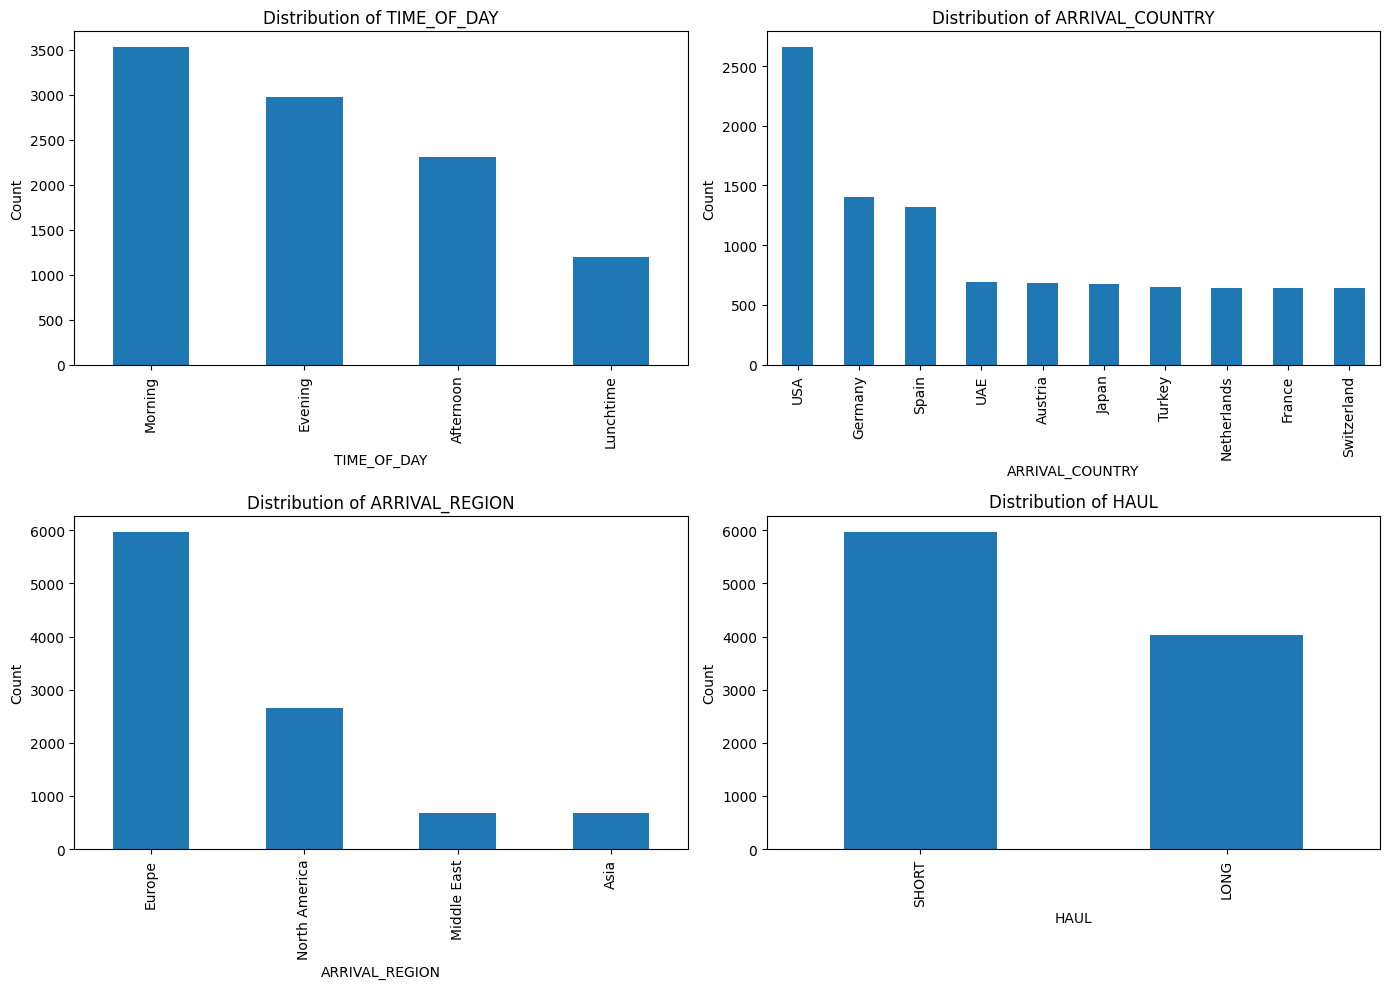

In [9]:
# Visualizing categorical features

categorical_vars=['TIME_OF_DAY', 'ARRIVAL_COUNTRY', 'ARRIVAL_REGION', 'HAUL'] # The features that I want to look at

fig, axes=plt.subplots(2, 2, figsize=(14, 10))
axes=axes.flatten()  # Making 2x2 grid to make it easier to look at

for ax, col in zip(axes, categorical_vars):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

From this visualization we see that:

- **Time of day:** Morning > evening > afternoon > lunchtime flights
- **Arrival country:** USA > Germany > Spain > UAE > Austria > Japan > Turkey > Netherlands > France > Switzerland (also note that these are all the unique countries in the dataset)
- **Arrival region:** Europe > North America > Middle East > Asia
- **Haul length:** Short > long

For the numerical features, the # of seats (first class, business, economy) of the aircraft do not really matter as they only reflect aircraft capacity so for numerical features, we will visualize just TIER1_ELIGIBLE_PAX, TIER2_ELIGIBLE_PAX, and TIER3_ELIGIBLE_PAX.

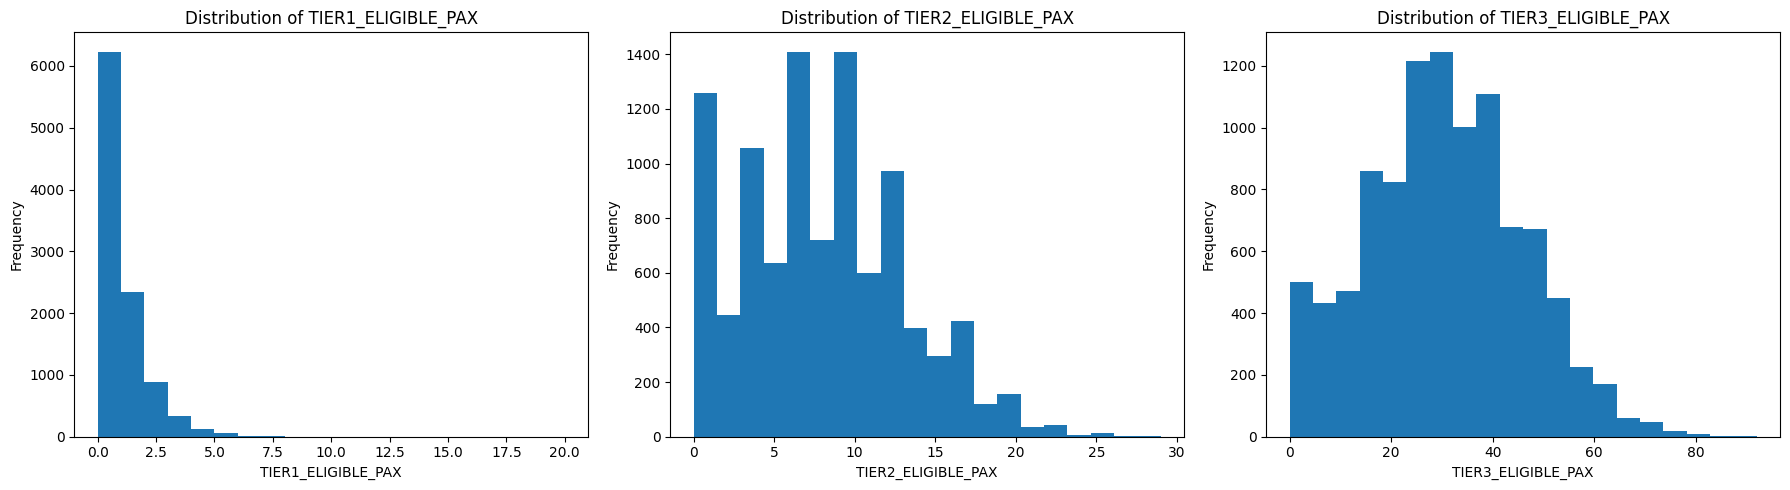

In [10]:
# Visualizing numerical features

numeric_vars=['TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']

fig, axes=plt.subplots(1, 3, figsize=(18, 5)) # 1x3 grid

for ax, col in zip(axes, numeric_vars):
    df[col].plot(kind='hist', bins=20, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

From this numerical visualization, we see that:

- Tier 1 (Concorde Room) passengers are right-skewed. Meaning there are more people who are ineligible than those who are eligible
- Tier 2 (First Lounge) passengers seem to be almost Normally distributed, with a little skew to the right as well. More passengers are eligible for tier 2 rather than tier 1
- Tier 3 (Club Lounge) has a Normal distribution. There are a lot of passengers who are eligible for this one

**Feature engineering**

Looking at the features, I notice that this is a dataset that is based on time and location (arrival region/country, haul time, time of day, etc.). There are no other factors in this dataset like weather or flight status. The example in the instructions noted that we could separate each grouping based on time of day, type of route, or region/destination group. I would like to do that, but I would also like to make use of the FLIGHT_DATE column and add 2 other layers of detail relating to time: season (a period of time) and holiday/vacations (culturally/socially marked times).

This will be a rough estimation because obviously different parts of the world sometimes celebrate different holidays and vacations at different times; but since this is a dataset based in London Heathrow, we will focus on holidays with this and also try to note other major vacation times for other major countries. To make it easy, we will just focus on UK + US holidays/vacations. From the FLIGHT_DATE column, we will extract the month so a new feature SEASON can be created. Also from the FLIGHT_DATE column, we will list out important dates for holidays and vacations and create a new feature HOLIDAY_VACATION.

**Very important note:** At this time, the dataset given only runs from April 1, 2025 to October 30, 2025. So major holidays and vacations such as spring break, Christmas/winter/New Year's vacation will be missed. But we will still go on with this detail as this can still be used in the future.

UK seasons are typically:

- Spring → March, April, May (3, 4, 5)
- Summer → June, July, August (6, 7, 8)
- Fall → September, October, November (9, 10, 11)
- Winter → December, January, February (12, 1, 2)

In [11]:
# Create new SEASON column

df['FLIGHT_DATE']=pd.to_datetime(df['FLIGHT_DATE']) # Change FLIGHT_DATE from object to datetime format
df['MONTH']=df['FLIGHT_DATE'].dt.month # Extract month number

# Function to assign season
def assign_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
        
df['SEASON']=df['MONTH'].apply(assign_season) # Apply function to df

In [12]:
df.head(5) # Check if it worked (yay, it did!)

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX,MONTH,SEASON
0,2025-09-02,14:19,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38,9,Fall
1,2025-06-10,6:42,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28,6,Summer
2,2025-10-27,15:33,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40,10,Fall
3,2025-06-15,18:29,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54,6,Summer
4,2025-08-25,20:35,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27,8,Summer


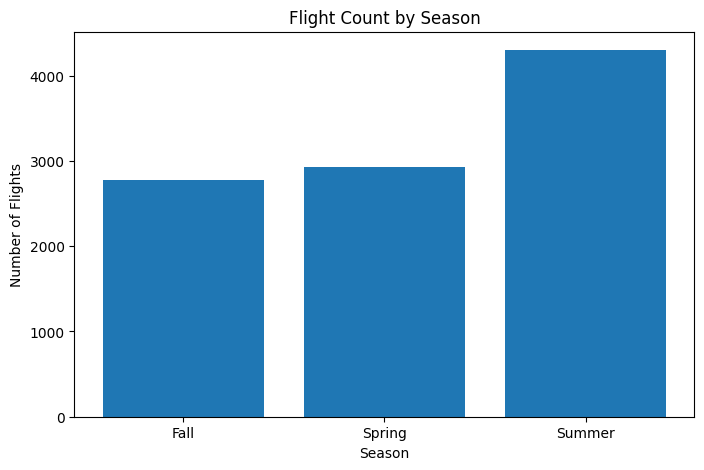

In [13]:
# Visualize season

season_counts=df['SEASON'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Number of Flights')
plt.title('Flight Count by Season')
plt.show()

Remember that this dataset only runs from April 1, 2025 to October 30, 2025 which is why there is no winter! We see that there are more flights in **Summer > Spring > Fall**. 

Since this dsataset isn't a full year, Summer is the only season with the correct months (6, 7, 8). Spring only has months 4 and 5 (since it started in April) and Fall only has months 9 and 10 (since this dataset ends in October).

In [14]:
# Create new HOLIDAY_VACATION column (UK + US holidays/vacations)

# Function to assign UK and US holiday and vacation times based on domain knowledge (we will do a range of dates to consider travel time)

def assign_holiday(date):
    year=date.year

    # UK holidays
    easter_start=pd.Timestamp(f"{year}-04-18")
    easter_end=pd.Timestamp(f"{year}-04-21")
    may_bank_start=pd.Timestamp(f"{year}-05-26")
    may_bank_end=pd.Timestamp(f"{year}-05-30")
    summer_start=pd.Timestamp(f"{year}-07-01")
    summer_end=pd.Timestamp(f"{year}-08-31")
    labor_day=pd.Timestamp(f"{year}-09-01")
    half_term_start=pd.Timestamp(f"{year}-10-27")
    half_term_end=pd.Timestamp(f"{year}-10-31")

    # US vacation patterns
    us_college_start=pd.Timestamp(f"{year}-05-05") # Based on my college school schedule and general knowledge
    us_college_end=pd.Timestamp(f"{year}-05-15")
    us_school_start=pd.Timestamp(f"{year}-06-01")
    us_school_end=pd.Timestamp(f"{year}-06-20")

    # Assign labels
    if easter_start <= date <= easter_end:
        return "Easter Holiday"
    elif may_bank_start <= date <= may_bank_end:
        return "May Bank Holiday"
    elif us_college_start <= date < us_college_end:
        return "US College Summer Start"
    elif us_school_start <= date <= us_school_end:
        return "US School Summer Start"
    elif summer_start <= date <= summer_end:
        return "UK Summer Vacation"
    elif date==labor_day:
        return "US Labor Day"
    elif half_term_start <= date <= half_term_end:
        return "UK Autumn Half Term"
    else:
        return "None"

df['HOLIDAY_VACATION']=df['FLIGHT_DATE'].apply(assign_holiday) # Apply the function

In [15]:
df.head(5) # Check to see if it works :) IT DID YAY

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX,MONTH,SEASON,HOLIDAY_VACATION
0,2025-09-02,14:19,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38,9,Fall,None
1,2025-06-10,6:42,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28,6,Summer,US School Summer Start
2,2025-10-27,15:33,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40,10,Fall,UK Autumn Half Term
3,2025-06-15,18:29,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54,6,Summer,US School Summer Start
4,2025-08-25,20:35,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27,8,Summer,UK Summer Vacation


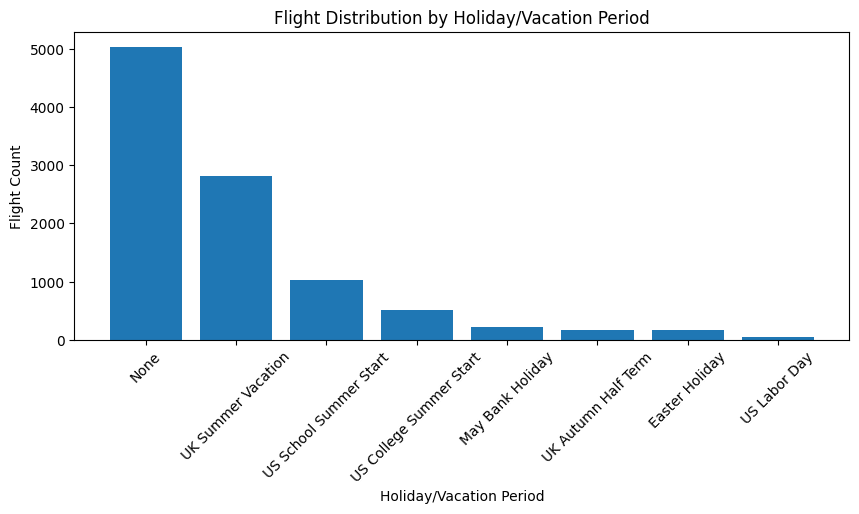

In [16]:
# Visualize holiday_vacation 

holiday_counts=df['HOLIDAY_VACATION'].value_counts()

plt.figure(figsize=(10,4))
plt.bar(holiday_counts.index, holiday_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Holiday/Vacation Period")
plt.ylabel("Flight Count")
plt.title("Flight Distribution by Holiday/Vacation Period")
plt.show()

From this we see there are more flights during None > UK summer vacation > US school summer start > US college summer start > May bank holiday > UK autumn half term > easter holiday > US labor day.

This patter shows that vacations have more weight than short holidays itself.

**Conditional visualization**

***SEASON X TIME_OF_DAY***

Top 5 of SEASON X TIME_OF_DAY: Tier 3 Evening, Tier 1 Afternoon, Tier 3 Lunchtime, Tier 3 Afternoon, Tier 2 Morning
- All the same for all seasons

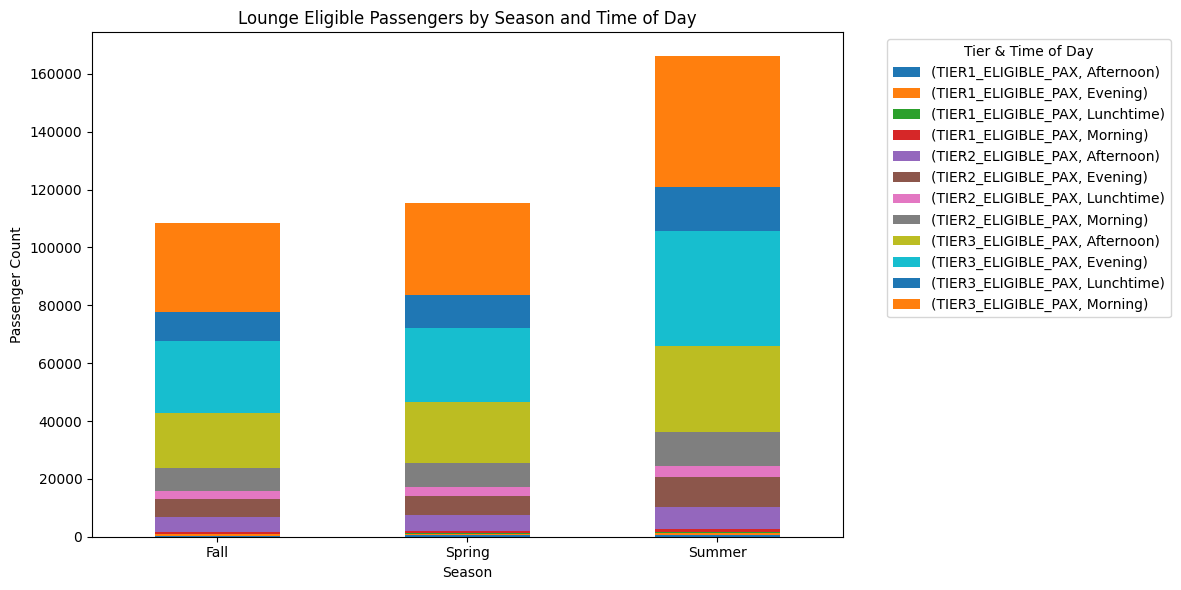

In [17]:
season_order=["Spring", "Summer", "Fall"]

# Lounge eligibility based on SEASON x TIME_OF_DAY
season_time_group=df.groupby(["SEASON", "TIME_OF_DAY"])[["TIER1_ELIGIBLE_PAX","TIER2_ELIGIBLE_PAX","TIER3_ELIGIBLE_PAX"]].sum()

# Reindex to ensure the seasons are in order
season_time_group=season_time_group.reindex(
    pd.MultiIndex.from_product([season_order, df["TIME_OF_DAY"].unique()], names=["SEASON", "TIME_OF_DAY"])).fillna(0)

# Plot stacked bars
season_time_group.unstack(level=1).plot(
    kind="bar",
    stacked=True,
    figsize=(12,6))

plt.title("Lounge Eligible Passengers by Season and Time of Day")
plt.ylabel("Passenger Count")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.legend(title="Tier & Time of Day", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

***HOLIDAY_VACATION x TIME_OF_DAY***

Same pattern for SEASON x TIME_OF_DAY
- None > UK summer vacation > US school summer start > US college summer start

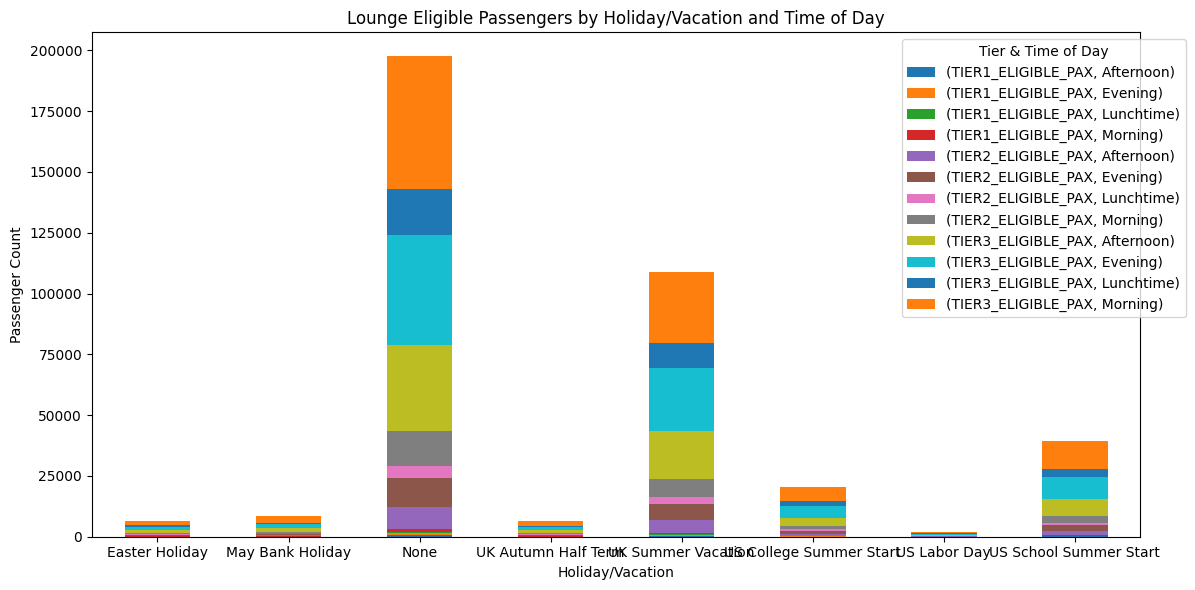

In [18]:
# Lounge eligibility based on HOLIDAY_VACATION x TIME_OF_DAY
holiday_time_group=df.groupby(["HOLIDAY_VACATION", "TIME_OF_DAY"])[["TIER1_ELIGIBLE_PAX", "TIER2_ELIGIBLE_PAX", "TIER3_ELIGIBLE_PAX"]].sum()

holiday_categories=df["HOLIDAY_VACATION"].unique()
time_categories=df["TIME_OF_DAY"].unique()
holiday_time_group=holiday_time_group.reindex(
    pd.MultiIndex.from_product([holiday_categories, time_categories], names=["HOLIDAY_VACATION", "TIME_OF_DAY"])).fillna(0)

holiday_time_group.unstack(level=1).plot(
    kind="bar",
    stacked=True,
    figsize=(12,6))

plt.title("Lounge Eligible Passengers by Holiday/Vacation and Time of Day")
plt.ylabel("Passenger Count")
plt.xlabel("Holiday/Vacation")
plt.xticks(rotation=0)
plt.legend(title="Tier & Time of Day", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

***SEASON x ARRIVAL_REGION***

Top 7 of SEASON x ARRIVAL_REGION: Tier 3 North America > Tier 3 Middle East > Tier 3 Europe > Tier 3 Asia > Tier 2 North America > Tier 2 Middle East > Tier 2 Europe
- Reinforces that tier 3 passengers are the majority class, then tier 2
- North America > Middle East > Europe > Asia

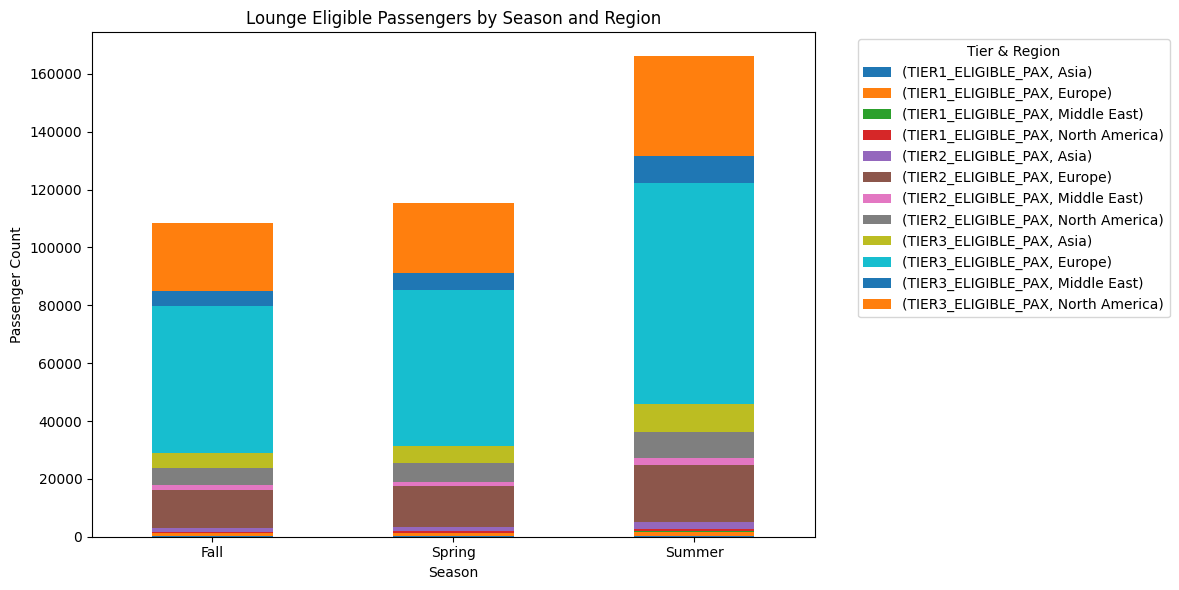

In [19]:
# Lounge eligibility based on SEASON x ARRIVAL_REGION
season_region_group=df.groupby(["SEASON", "ARRIVAL_REGION"])[["TIER1_ELIGIBLE_PAX", "TIER2_ELIGIBLE_PAX", "TIER3_ELIGIBLE_PAX"]].sum()

# Reindex to keep the seasons in order
season_region_group=season_region_group.reindex(pd.MultiIndex.from_product([season_order, df['ARRIVAL_REGION'].unique()], names=['SEASON','ARRIVAL_REGION'])).fillna(0)

season_region_group.unstack(level=1).plot(
    kind="bar",
    stacked=True,
    figsize=(12,6))

plt.title("Lounge Eligible Passengers by Season and Region")
plt.ylabel("Passenger Count")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.legend(title="Tier & Region", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

***HAUL x ARRIVAL_REGION***

- Haul haul: Tier 3 North America > Tier 3 Middle East, Tier 3 Asia, Tier 2 North America
- Short haul: Tier 3 Europe > Tier 2 Europe > Tier 1 Europe
- For short hauls, Europe dominates

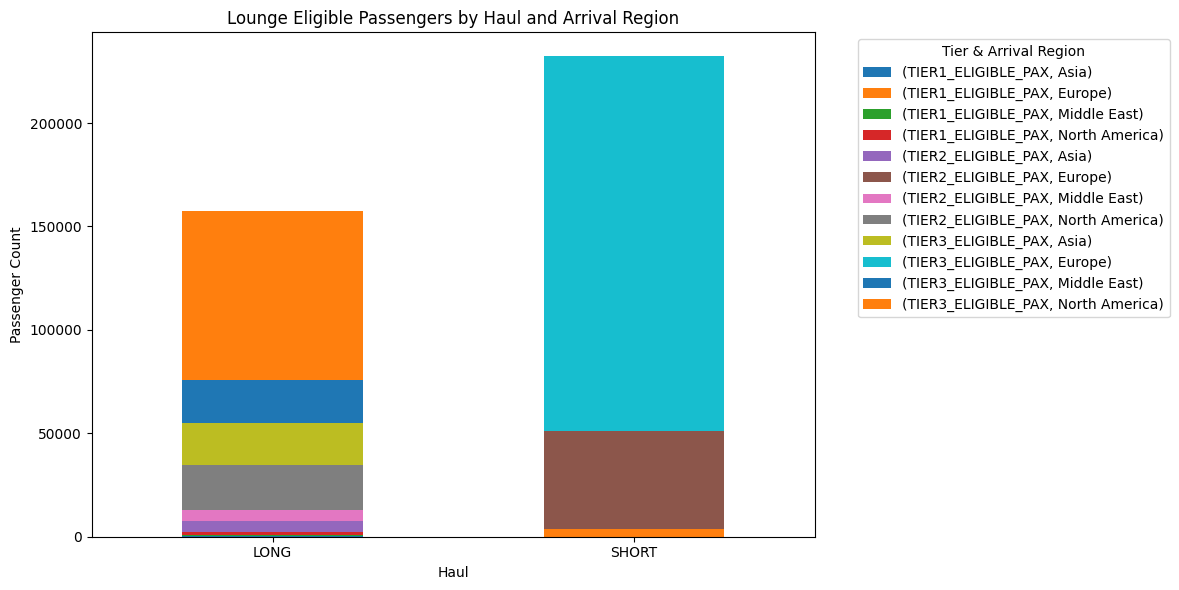

In [20]:
# Lounge eligibility based on HAUL x ARRIVAL_REGION
haul_region_group=df.groupby(["HAUL", "ARRIVAL_REGION"])[["TIER1_ELIGIBLE_PAX", "TIER2_ELIGIBLE_PAX", "TIER3_ELIGIBLE_PAX"]].sum()

haul_categories=df["HAUL"].unique()
region_categories=df["ARRIVAL_REGION"].unique()
haul_region_group=haul_region_group.reindex(
    pd.MultiIndex.from_product([haul_categories, region_categories], names=["HAUL", "ARRIVAL_REGION"])).fillna(0)

haul_region_group.unstack(level=1).plot(
    kind="bar",
    stacked=True,
    figsize=(12,6))

plt.title("Lounge Eligible Passengers by Haul and Arrival Region")
plt.ylabel("Passenger Count")
plt.xlabel("Haul")
plt.xticks(rotation=0)
plt.legend(title="Tier & Arrival Region", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

***HAUL x SEASON***

- Same for long and short haul
- Tier 3 Summer > Tier 3 Spring > Tier 3 Fall
- Reinforces what we discovered earlier about Summer > Spring > Fall

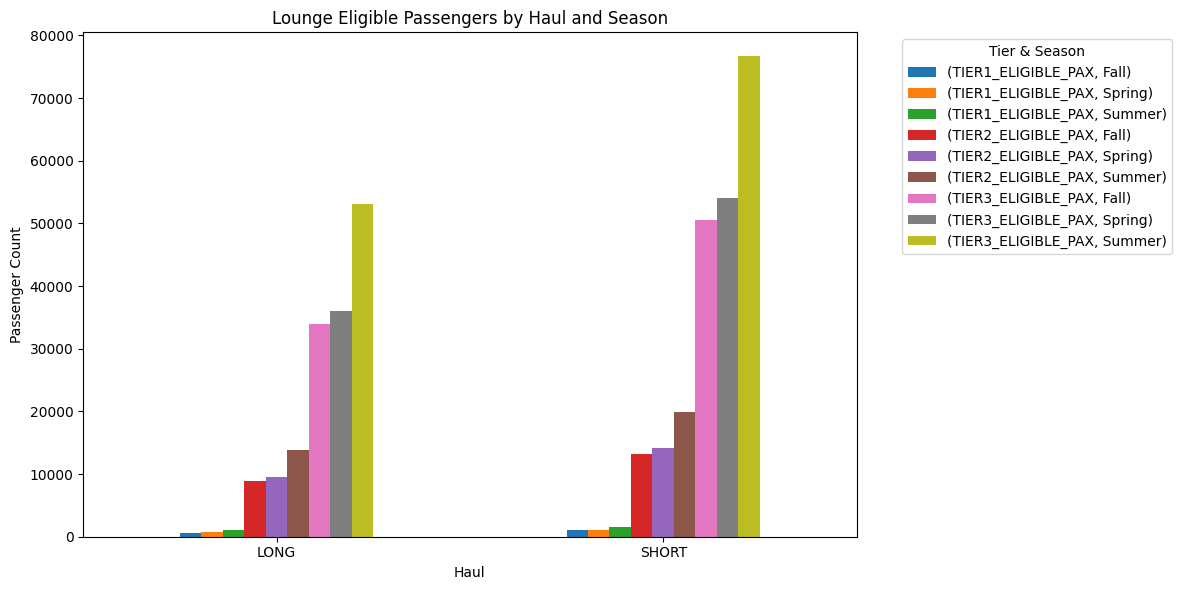

In [21]:
# Lounge eligibility based on HAUL x SEASON
haul_season_group=df.groupby(["HAUL", "SEASON"])[["TIER1_ELIGIBLE_PAX", "TIER2_ELIGIBLE_PAX", "TIER3_ELIGIBLE_PAX"]].sum()

haul_categories=df["HAUL"].unique()
haul_season_group=haul_season_group.reindex(
    pd.MultiIndex.from_product([haul_categories, season_order], names=["HAUL", "SEASON"])).fillna(0)

haul_season_group.unstack(level=1).plot(
    kind="bar",
    stacked=False,
    figsize=(12,6))

plt.title("Lounge Eligible Passengers by Haul and Season")
plt.ylabel("Passenger Count")
plt.xlabel("Haul")
plt.xticks(rotation=0)
plt.legend(title="Tier & Season", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

***HAUL x TIME_OF_DAY***

- Same for long and short hauls
- Reinforces Morning > Lunchtime > Evening > Afternoon
- Tier 3 > Tier 2 > Tier 1

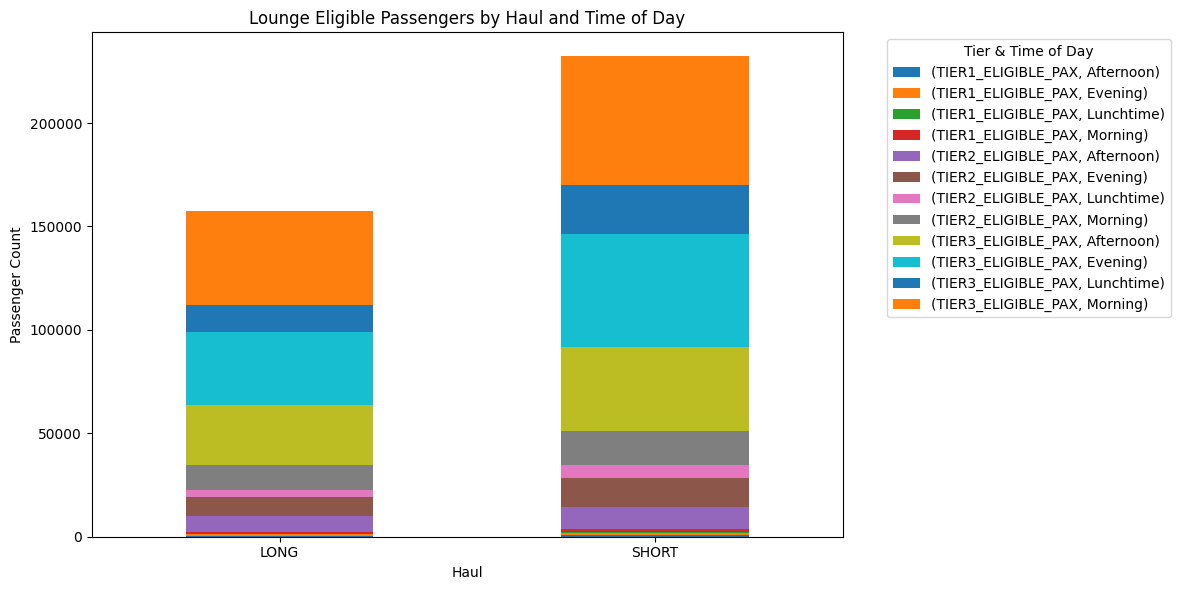

In [22]:
# Lounge eligibility based on HAUL x TIME_OF_DAY
haul_time_group = df.groupby(["HAUL", "TIME_OF_DAY"])[["TIER1_ELIGIBLE_PAX", "TIER2_ELIGIBLE_PAX", "TIER3_ELIGIBLE_PAX"]].sum()

haul_categories=df["HAUL"].unique()
time_categories=df["TIME_OF_DAY"].unique()
haul_time_group=haul_time_group.reindex(
    pd.MultiIndex.from_product([haul_categories, time_categories], names=["HAUL", "TIME_OF_DAY"])).fillna(0)

haul_time_group.unstack(level=1).plot(
    kind="bar",
    stacked=True,
    figsize=(12,6))

plt.title("Lounge Eligible Passengers by Haul and Time of Day")
plt.ylabel("Passenger Count")
plt.xlabel("Haul")
plt.xticks(rotation=0)
plt.legend(title="Tier & Time of Day", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

***HAUL x HOLIDAY_VACATION***

- Reinforces tier 3 > tier 2 > tier 1
- More for short haul
- Reinforces None > UK summer vacation > US school summer start > US college summer start

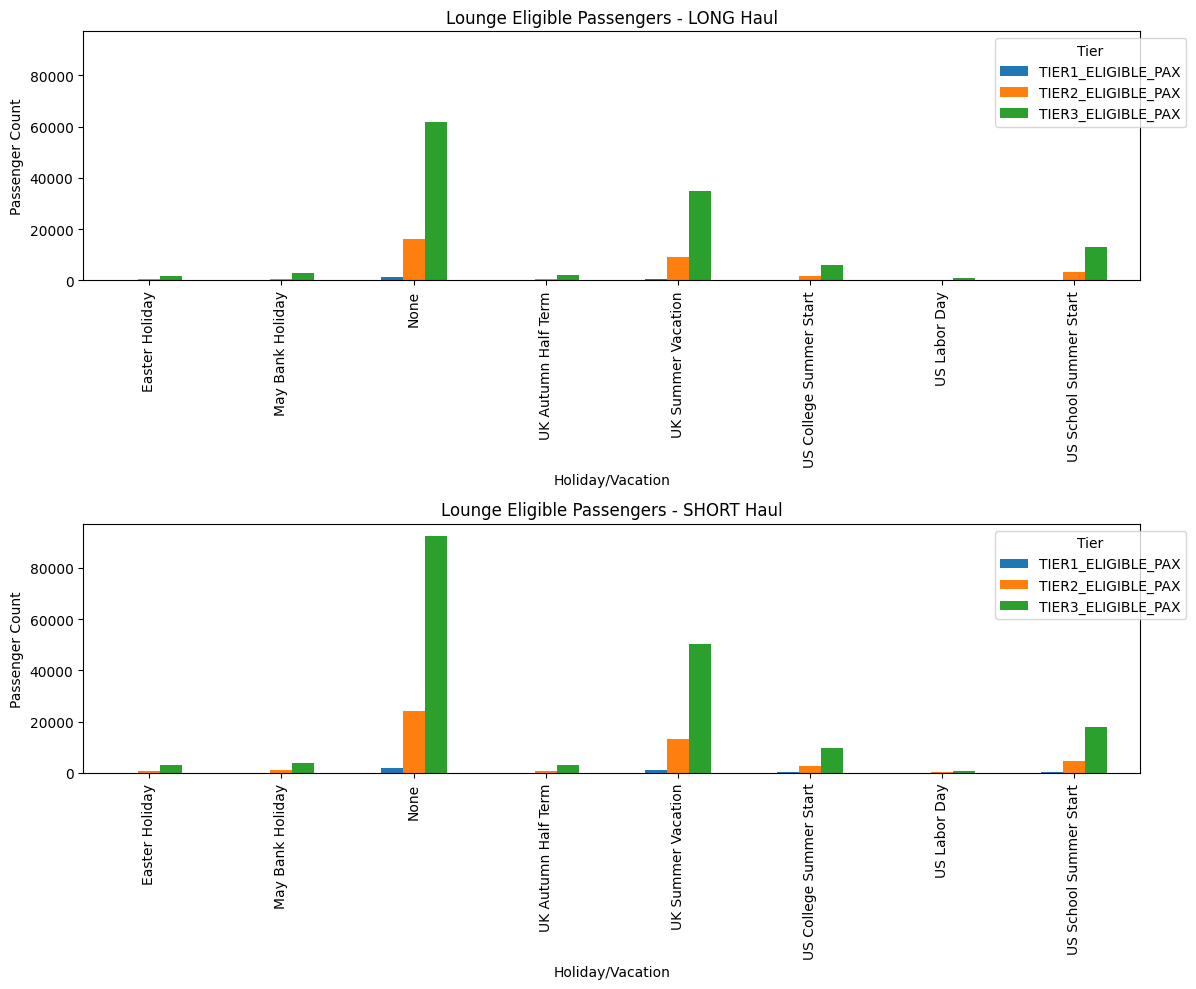

In [23]:
haul_categories=df["HAUL"].unique()
holiday_categories=df["HOLIDAY_VACATION"].unique()
tiers=["TIER1_ELIGIBLE_PAX", "TIER2_ELIGIBLE_PAX", "TIER3_ELIGIBLE_PAX"]

fig, axes = plt.subplots(len(haul_categories), 1, figsize=(12, 5*len(haul_categories)), sharey=True)

for ax, haul in zip(axes, haul_categories):
    subset = df[df["HAUL"] == haul].groupby("HOLIDAY_VACATION")[tiers].sum()
    subset.plot(kind="bar", stacked=False, ax=ax)
    ax.set_title(f"Lounge Eligible Passengers - {haul} Haul")
    ax.set_ylabel("Passenger Count")
    ax.set_xlabel("Holiday/Vacation")
    ax.legend(title="Tier", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Overall Insights:**
- For short hauls, Europe is the dominant region (domestic flights, perhaps)
- Conditional visualization reinforces statistics seen in individual feature visualization
- **Time of day:** Morning > evening > afternoon > lunchtime flights
- **Arrival country:** USA > Germany > Spain > UAE > Austria > Japan > Turkey > Netherlands > France > Switzerland (also note that these are all the unique countries in the dataset)
- **Arrival region:** Europe > North America > Middle East > Asia
- **Haul length:** Short > long
- **Season:** Summer > Spring > Fall
- **Holidays/vacations:** None > UK summer vacation > US school summer start > US college summer start > May bank holiday > UK autumn half term > easter holiday > US labor day
- **Tiers:** Tier 3 > tier 2 > tier 1

### **Part 4: Choosing groupings**

We can combine our groups we made based on one or two criteria or however many. I'd like to go specific for this challenge so we can see some insights and patterns with lounge demand based on passenger eligibility % of that specific grouping.

**Predicted High Lounge Pressure Combos**
- Group 1: Morning + Summer + Short + No Holiday
    - Highest lounge demand and baseline peak
- Group 2: Morning + Summer + Short-Haul + Holiday
    - Holiday peak demand
- Group 3: Morning + Summer + Long-haul + No Holiday
    - Long-haul peak baseline for no holidays

**Predicted Medium Lounge Pressure Combos**
- Group 4: Evening + Summer Long-Haul + No Holiday
    - A little more leisure 
- Group 5: Evening + Summer + Long-Haul + Holiday
    - Holiday driven long haul demand
- Group 6: Morning + Non-Summer (Spring+Fall) + Short-Haul
    - Non-summer business travel flights

**Predicted Low Lounge Pressure Combos**
- Group 7: Lunchtime + Short-Haul
    - Low lounge demand
- Group 8: Afternoon + Non-Summer (Spring+Fall) + Short-Haul 
    - Off-season regional travel 
- Group 9: Short-Haul + No Holiday + Fall
    - Should be lowest demand

### **Part 5: Statistical calculations for each grouping**

**Understanding:** My understanding for the tier %'s goes not as "On this date, this tier was n%" but rather "For Morning+Summer+Short-Haul (Group 1) flights, n% of passengers fall into this tier."

In [24]:
# Check if data looks good and TIER#_ELIGIBLE_PAX is present for all tiers
df.head(5) # Looks good!

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX,MONTH,SEASON,HOLIDAY_VACATION
0,2025-09-02,14:19,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38,9,Fall,None
1,2025-06-10,6:42,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28,6,Summer,US School Summer Start
2,2025-10-27,15:33,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40,10,Fall,UK Autumn Half Term
3,2025-06-15,18:29,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54,6,Summer,US School Summer Start
4,2025-08-25,20:35,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27,8,Summer,UK Summer Vacation


**Finding %'s for Group 1 (Morning + Summer + Short + No Holiday)**

In [32]:
group1 = df[
    (df["TIME_OF_DAY"] == "Morning") &
    (df["SEASON"] == "Summer") &
    (df["HAUL"] == "SHORT") &
    (df["HOLIDAY_VACATION"] == "None")]

g1_tier1_total = group1["TIER1_ELIGIBLE_PAX"].sum()
g1_tier2_total = group1["TIER2_ELIGIBLE_PAX"].sum()
g1_tier3_total = group1["TIER3_ELIGIBLE_PAX"].sum()

g1_total = g1_tier1_total + g1_tier2_total + g1_tier3_total
g1_tier1_pct = g1_tier1_total / g1_total * 100
g1_tier2_pct = g1_tier2_total / g1_total * 100
g1_tier3_pct = g1_tier3_total / g1_total * 100

print(f"Group 1 Tier %: Tier1={g1_tier1_pct:.1f}%, Tier2=g1_{g1_tier2_pct:.1f}%, Tier3={g1_tier3_pct:.1f}%")

Group 1 Tier %: Tier1=2.0%, Tier2=g1_19.8%, Tier3=78.2%


**Finding %'s for Group 2 (Morning + Summer + Short + Holiday)**

In [33]:
group2 = df[
    (df["TIME_OF_DAY"] == "Morning") &
    (df["SEASON"] == "Summer") &
    (df["HAUL"] == "SHORT") &
    (df["HOLIDAY_VACATION"]!= "None")]

g2_tier1_total = group2["TIER1_ELIGIBLE_PAX"].sum()
g2_tier2_total = group2["TIER2_ELIGIBLE_PAX"].sum()
g2_tier3_total = group2["TIER3_ELIGIBLE_PAX"].sum()

g2_total = g2_tier1_total + g2_tier2_total + g2_tier3_total
g2_tier1_pct = g2_tier1_total / g2_total * 100
g2_tier2_pct = g2_tier2_total / g2_total * 100
g2_tier3_pct = g2_tier3_total / g2_total * 100

print(f"Group 2 Tier %: Tier1={g2_tier1_pct:.1f}%, Tier2={g2_tier2_pct:.1f}%, Tier3={g2_tier3_pct:.1f}%")

Group 2 Tier %: Tier1=1.6%, Tier2=20.3%, Tier3=78.1%


**Finding %'s for Group 3 (Morning + Summer + Long + No Holiday)**

In [35]:
group3 = df[
    (df["TIME_OF_DAY"] == "Morning") &
    (df["SEASON"] == "Summer") &
    (df["HAUL"] == "LONG") &
    (df["HOLIDAY_VACATION"] == "None")]

g3_tier1_total = group3["TIER1_ELIGIBLE_PAX"].sum()
g3_tier2_total = group3["TIER2_ELIGIBLE_PAX"].sum()
g3_tier3_total = group3["TIER3_ELIGIBLE_PAX"].sum()

g3_total = g3_tier1_total + g3_tier2_total + g3_tier3_total
g3_tier1_pct = g3_tier1_total / g3_total * 100
g3_tier2_pct = g3_tier2_total / g3_total * 100
g3_tier3_pct = g3_tier3_total / g3_total * 100

print(f"Group 3 Tier %: Tier1={g3_tier1_pct:.1f}%, Tier2=g1_{g3_tier2_pct:.1f}%, Tier3={g3_tier3_pct:.1f}%")

Group 3 Tier %: Tier1=2.1%, Tier2=g1_20.2%, Tier3=77.7%


**Finding %'s for Group 4 (Evening + Summer + Long + No Holiday)**

In [36]:
group4 = df[
    (df["TIME_OF_DAY"] == "Evening") &
    (df["SEASON"] == "Summer") &
    (df["HAUL"] == "LONG") &
    (df["HOLIDAY_VACATION"] == "None")]

g4_tier1_total = group4["TIER1_ELIGIBLE_PAX"].sum()
g4_tier2_total = group4["TIER2_ELIGIBLE_PAX"].sum()
g4_tier3_total = group4["TIER3_ELIGIBLE_PAX"].sum()

g4_total = g4_tier1_total + g4_tier2_total + g4_tier3_total
g4_tier1_pct = g4_tier1_total / g4_total * 100
g4_tier2_pct = g4_tier2_total / g4_total * 100
g4_tier3_pct = g4_tier3_total / g4_total * 100

print(f"Group 4 Tier %: Tier1={g4_tier1_pct:.1f}%, Tier2=g1_{g4_tier2_pct:.1f}%, Tier3={g4_tier3_pct:.1f}%")

Group 4 Tier %: Tier1=2.2%, Tier2=g1_19.6%, Tier3=78.2%


**Finding %'s for Group 5 (Evening + Summer + Long + Holiday)**

In [37]:
group5 = df[
    (df["TIME_OF_DAY"] == "Evening") &
    (df["SEASON"] == "Summer") &
    (df["HAUL"] == "LONG") &
    (df["HOLIDAY_VACATION"]!= "None")]

g5_tier1_total = group5["TIER1_ELIGIBLE_PAX"].sum()
g5_tier2_total = group5["TIER2_ELIGIBLE_PAX"].sum()
g5_tier3_total = group5["TIER3_ELIGIBLE_PAX"].sum()

g5_total = g5_tier1_total + g5_tier2_total + g5_tier3_total
g5_tier1_pct = g5_tier1_total / g5_total * 100
g5_tier2_pct = g5_tier2_total / g5_total * 100
g5_tier3_pct = g5_tier3_total / g5_total * 100

print(f"Group 5 Tier %: Tier1={g5_tier1_pct:.1f}%, Tier2={g5_tier2_pct:.1f}%, Tier3={g5_tier3_pct:.1f}%")

Group 5 Tier %: Tier1=1.5%, Tier2=20.3%, Tier3=78.1%


**Finding %'s for Group 6 (Morning + Non-Summer + Short)**

In [42]:
group6 = df[
    (df["TIME_OF_DAY"] == "Morning") &
    (df["SEASON"] != "Summer") &
    (df["HAUL"] == "SHORT")]

g6_tier1_total = group6["TIER1_ELIGIBLE_PAX"].sum()
g6_tier2_total = group6["TIER2_ELIGIBLE_PAX"].sum()
g6_tier3_total = group6["TIER3_ELIGIBLE_PAX"].sum()

g6_total = g6_tier1_total + g6_tier2_total + g6_tier3_total
g6_tier1_pct = g6_tier1_total / g6_total * 100
g6_tier2_pct = g6_tier2_total / g6_total * 100
g6_tier3_pct = g6_tier3_total / g6_total * 100

print(f"Group 6 Tier %: Tier1={g6_tier1_pct:.1f}%, Tier2={g6_tier2_pct:.1f}%, Tier3={g6_tier3_pct:.1f}%")

Group 6 Tier %: Tier1=1.5%, Tier2=20.4%, Tier3=78.1%


**Finding %'s for Group 7 (Lunchtime + Short)**

In [43]:
group7 = df[
    (df["TIME_OF_DAY"] == "Lunchtime") &
    (df["HAUL"] == "SHORT")]

g7_tier1_total = group7["TIER1_ELIGIBLE_PAX"].sum()
g7_tier2_total = group7["TIER2_ELIGIBLE_PAX"].sum()
g7_tier3_total = group7["TIER3_ELIGIBLE_PAX"].sum()

g7_total = g7_tier1_total + g7_tier2_total + g7_tier3_total
g7_tier1_pct = g7_tier1_total / g7_total * 100
g7_tier2_pct = g7_tier2_total / g7_total * 100
g7_tier3_pct = g7_tier3_total / g7_total * 100

print(f"Group 6 Tier %: Tier1={g7_tier1_pct:.1f}%, Tier2={g7_tier2_pct:.1f}%, Tier3={g7_tier3_pct:.1f}%")

Group 6 Tier %: Tier1=1.8%, Tier2=20.5%, Tier3=77.8%


**Finding %'s for Group 8 (Afternoon + Non-Summer + Short)**

In [44]:
group8 = df[
    (df["TIME_OF_DAY"] == "Afternoon") &
    (df["SEASON"] != "Summer") &
    (df["HAUL"] == "SHORT")]

g8_tier1_total = group8["TIER1_ELIGIBLE_PAX"].sum()
g8_tier2_total = group8["TIER2_ELIGIBLE_PAX"].sum()
g8_tier3_total = group8["TIER3_ELIGIBLE_PAX"].sum()

g8_total = g8_tier1_total + g8_tier2_total + g8_tier3_total
g8_tier1_pct = g8_tier1_total / g8_total * 100
g8_tier2_pct = g8_tier2_total / g8_total * 100
g8_tier3_pct = g8_tier3_total / g8_total * 100

print(f"Group 8 Tier %: Tier1={g8_tier1_pct:.1f}%, Tier2={g8_tier2_pct:.1f}%, Tier3={g8_tier3_pct:.1f}%")

Group 8 Tier %: Tier1=1.6%, Tier2=20.4%, Tier3=78.0%


**Finding %'s for Group 9 (Short + Holiday + Fall)**

In [47]:
group9 = df[
    (df["HOLIDAY_VACATION"] == "None") &
    (df["SEASON"] == "Fall") &
    (df["HAUL"] == "SHORT")]

g9_tier1_total = group9["TIER1_ELIGIBLE_PAX"].sum()
g9_tier2_total = group9["TIER2_ELIGIBLE_PAX"].sum()
g9_tier3_total = group9["TIER3_ELIGIBLE_PAX"].sum()

g9_total = g9_tier1_total + g9_tier2_total + g9_tier3_total
g9_tier1_pct = g9_tier1_total / g9_total * 100
g9_tier2_pct = g9_tier2_total / g9_total * 100
g9_tier3_pct = g9_tier3_total / g9_total * 100

print(f"Group 9 Tier %: Tier1={g9_tier1_pct:.1f}%, Tier2={g9_tier2_pct:.1f}%, Tier3={g9_tier3_pct:.1f}%")

Group 9 Tier %: Tier1=1.6%, Tier2=20.4%, Tier3=78.0%


### **Part 6: Conclusion**

In [65]:
# Creating the look up table for easier viewing and visualization
lookup_table = pd.DataFrame({
    "Grouping": [
        "Group 1: Morning + Summer + Short-Haul + Non-Holiday",
        "Group 2: Morning + Summer + Short-Haul + Holiday",
        "Group 3: Morning + Summer + Long-Haul + Non-Holiday",
        "Group 4: Evening + Summer + Long-Haul + Non-Holiday",
        "Group 5: Evening + Summer + Long-Haul + Holiday",
        "Group 6: Morning + Non-Summer + Short-Haul",
        "Group 7: Lunchtime + Short-Haul",
        "Group 8: Afternoon + Non-Summer + Short-Haul",
        "Group 9: Short-Haul + Non-Holiday + Fall"],
    "Tier 1 %": [g1_tier1_pct, g2_tier1_pct, g3_tier1_pct, g4_tier1_pct, g5_tier1_pct, g6_tier1_pct, g7_tier1_pct, g8_tier1_pct, g9_tier1_pct],
    "Tier 2 %": [g1_tier2_pct, g2_tier2_pct, g3_tier2_pct, g4_tier2_pct, g5_tier2_pct, g6_tier2_pct, g7_tier2_pct, g8_tier2_pct, g9_tier2_pct],
    "Tier 3 %": [g1_tier3_pct, g2_tier3_pct, g3_tier3_pct, g4_tier3_pct, g5_tier3_pct, g6_tier3_pct, g7_tier3_pct, g8_tier3_pct, g9_tier3_pct]})

lookup_table

,Grouping,Tier 1 %,Tier 2 %,Tier 3 %
0,Group 1: Morning + Summer + Short-Haul + Non-H...,2.041943,19.757174,78.200883
1,Group 2: Morning + Summer + Short-Haul + Holiday,1.606914,20.315981,78.077105
2,Group 3: Morning + Summer + Long-Haul + Non-Ho...,2.148612,20.188004,77.663384
3,Group 4: Evening + Summer + Long-Haul + Non-Ho...,2.197183,19.605634,78.197183
4,Group 5: Evening + Summer + Long-Haul + Holiday,1.546702,20.325736,78.127562
5,Group 6: Morning + Non-Summer + Short-Haul,1.536349,20.375933,78.087718
6,Group 7: Lunchtime + Short-Haul,1.773799,20.473013,77.753188
7,Group 8: Afternoon + Non-Summer + Short-Haul,1.604120,20.394305,78.001575
8,Group 9: Short-Haul + Non-Holiday + Fall,1.554845,20.446289,77.998867


In [67]:
# Creating the look up table for easier viewing and visualization, example arrival countries will be included!
# The function to get unique arrival countries for a given group
def get_arrival_countries(group_df):
    return ", ".join(sorted(group_df["ARRIVAL_COUNTRY"].unique()))

# Defining groups
groups = {
    "Group 1: Morning + Summer + Short-Haul + Non-Holiday": group1,
    "Group 2: Morning + Summer + Short-Haul + Holiday": group2,
    "Group 3: Morning + Summer + Long-Haul + Non-Holiday": group3,
    "Group 4: Evening + Summer + Long-Haul + Non-Holiday": group4,
    "Group 5: Evening + Summer + Long-Haul + Holiday": group5,
    "Group 6: Morning + Non-Summer + Short-Haul": group6,
    "Group 7: Lunchtime + Short-Haul": group7,
    "Group 8: Afternoon + Non-Summer + Short-Haul": group8,
    "Group 9: Short-Haul + Non-Holiday + Fall": group9}

# Create the lookup table dynamically
lookup_table = []

for name, group_df in groups.items():
    total = group_df["TIER1_ELIGIBLE_PAX"].sum() + group_df["TIER2_ELIGIBLE_PAX"].sum() + group_df["TIER3_ELIGIBLE_PAX"].sum()
    tier1_pct = group_df["TIER1_ELIGIBLE_PAX"].sum() / total * 100
    tier2_pct = group_df["TIER2_ELIGIBLE_PAX"].sum() / total * 100
    tier3_pct = group_df["TIER3_ELIGIBLE_PAX"].sum() / total * 100
    
    arrival_countries = get_arrival_countries(group_df)
    
    lookup_table.append({
        "Grouping": name,
        "Arrival Country": arrival_countries,
        "Tier 1 %": tier1_pct,
        "Tier 2 %": tier2_pct,
        "Tier 3 %": tier3_pct})

lookup_table = pd.DataFrame(lookup_table)
lookup_table

,Grouping,Arrival Country,Tier 1 %,Tier 2 %,Tier 3 %
0,Group 1: Morning + Summer + Short-Haul + Non-H...,"Austria, France, Germany, Netherlands, Spain, ...",2.041943,19.757174,78.200883
1,Group 2: Morning + Summer + Short-Haul + Holiday,"Austria, France, Germany, Netherlands, Spain, ...",1.606914,20.315981,78.077105
2,Group 3: Morning + Summer + Long-Haul + Non-Ho...,"Japan, UAE, USA",2.148612,20.188004,77.663384
3,Group 4: Evening + Summer + Long-Haul + Non-Ho...,"Japan, UAE, USA",2.197183,19.605634,78.197183
4,Group 5: Evening + Summer + Long-Haul + Holiday,"Japan, UAE, USA",1.546702,20.325736,78.127562
5,Group 6: Morning + Non-Summer + Short-Haul,"Austria, France, Germany, Netherlands, Spain, ...",1.536349,20.375933,78.087718
6,Group 7: Lunchtime + Short-Haul,"Austria, France, Germany, Netherlands, Spain, ...",1.773799,20.473013,77.753188
7,Group 8: Afternoon + Non-Summer + Short-Haul,"Austria, France, Germany, Netherlands, Spain, ...",1.604120,20.394305,78.001575
8,Group 9: Short-Haul + Non-Holiday + Fall,"Austria, France, Germany, Netherlands, Spain, ...",1.554845,20.446289,77.998867


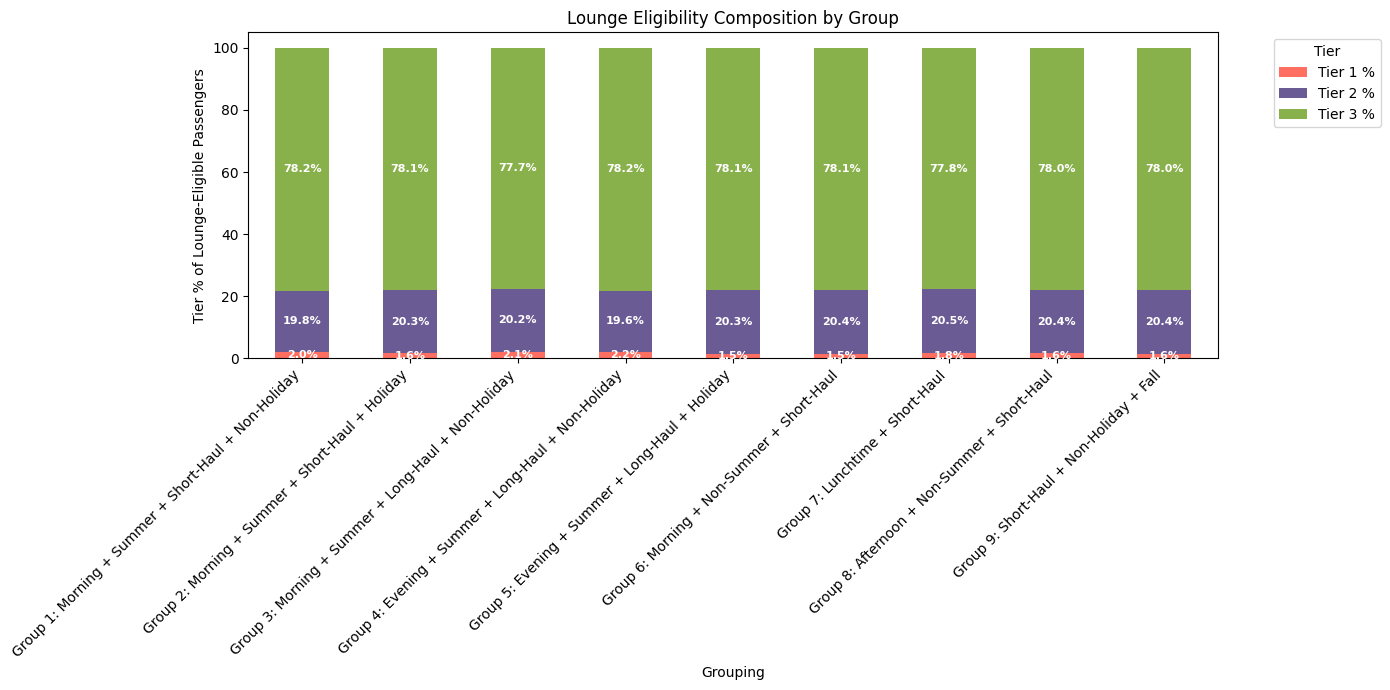

In [66]:
# Visualize and compare results
# Set index to Grouping for plotting
lookup_table_plot = lookup_table.set_index("Grouping")

# Plot stacked bar
ax = lookup_table_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(14,7),
    color=["#FF6F61", "#6B5B95", "#88B04B"]) #tier colors!

plt.ylabel("Tier % of Lounge-Eligible Passengers")
plt.title("Lounge Eligibility Composition by Group")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tier", bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Add numbers on bars and for a cleaner look, just comment this section out (but then number percentages won't be visible)
for i, group in enumerate(lookup_table_plot.index):
    bottom = 0
    for tier in ["Tier 1 %", "Tier 2 %", "Tier 3 %"]:
        val = lookup_table_plot.loc[group, tier]
        if val > 0:  # only annotate if >0
            ax.text(
                i, 
                bottom + val/2,  # place text in the middle of the segment
                f"{val:.1f}%", 
                ha="center", 
                va="center",
                color="white",
                fontsize=8,
                fontweight="bold")
        bottom += val
plt.show()

**Important insights**

- **Tier 3 dominates all groups, consistently making up around 77-78% of lounge-eligible passengers**
    - Confirms that most lounge usage comes from business class or loyal members, which is the core segment for BA lounges
    - Planning focus should primarily account for Tier 3 traffic, meaning prioritize space and services for business class/Silver cardholders
- **Tier 2 is the second-largest group and stable statistics with ~19-21 in all groups**
- **Highest Tier 1 proportion occurs in long-haul groups (Groups 3 & 4)**
    - Makes sense becuase first-class travel happens more on long-haul flights
    - Allocate premium seating accordingly
- **Impact of holidays is subtle**
    - Comparing Group 1 vs Group 2 (morning + summer + short-haul, non-holiday vs holiday):
        - Tier 3 drops slightly (~78.2 -> 78.08%)
        - Tier 2 increases slightly (~19.76 -> 20.32%)
            - Short-haul mornings in summer (Groups 1 & 2) are high-demand control peaks which are useful for estimating baseline lounge usage
    - Holidays slightly shift lounge composition toward Tier 2, but overall Tier 3 dominance remains
    - Holiday amplification mainly affects absolute passenger numbers, not percentages
        - Plan staffing and catering for peaks.
- **Low-demand or off-season groups are consistent**
    - Groups 7–9 (lunchtime, afternoon, fall, short-haul) show slightly lower Tier 1 % (~1.55–1.77%), Tier 3 remains around 77–78%
    - Confirms these off-peak times are stable but less premium-heavy
    - Low-stress times and good for maintenance and flexibile space